In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, roc_auc_score, f1_score, confusion_matrix, precision_score

In [3]:
df=pd.read_csv('E:\pythonn\Projects\datasetWithoutScale.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\pc\AppData\Local\Temp\ipykernel_12080\1757877457.py:1: SyntaxWarning: invalid escape sequence '\p'
  df=pd.read_csv('E:\pythonn\Projects\datasetWithoutScale.csv')


,Unnamed: 0,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,age_bmi_interaction,cardiovascular_risk_score,gender_Male,...,smoking_status_never smoked,smoking_status_smokes,age_group_Adult,age_group_Middle-Aged,age_group_Senior,bmi_class_Normal,bmi_class_Overweight,bmi_class_Obese,glucose_risk_Prediabetes,glucose_risk_Diabetes
0,0,67.0,0,1,228.69,36.6,1,2452.2,1,True,...,False,False,False,False,True,False,False,True,False,True
1,1,61.0,0,0,202.21,29.1,1,1775.1,0,False,...,True,False,False,False,True,False,True,False,False,True
2,2,80.0,0,1,105.92,32.5,1,2600.0,1,True,...,True,False,False,False,True,False,False,True,False,False
3,3,49.0,0,0,171.23,34.4,1,1685.6,0,False,...,False,True,False,True,False,False,False,True,True,False
4,4,79.0,1,0,174.12,24.0,1,1896.0,1,False,...,True,False,False,False,True,True,False,False,True,False


In [4]:
X = df.drop('stroke', axis=1)
y = df['stroke']

In [ ]:

if 'Unnamed: 0' in X.columns:
    X = X.drop('Unnamed: 0', axis=1)



In [6]:
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=0.2,random_state=42, stratify=y)

In [7]:
if 'Unnamed: 0' in X_train.columns:
    X_train = X_train.drop('Unnamed: 0', axis=1)

if 'Unnamed: 0' in X_test.columns:
    X_test = X_test.drop('Unnamed: 0', axis=1)

In [8]:
numerical_cols = ['age', 'avg_glucose_level', 'bmi', 'age_bmi_interaction']
scaler = StandardScaler()

In [9]:
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve

# ------------------------------------------------------------------

log_reg = LogisticRegression(
    penalty='l1',
    C=0.3,
    class_weight='balanced',
    solver='saga',
    max_iter=1000,
    random_state=42,
    n_jobs=-1
)
log_reg.fit(X_train, y_train)

y_proba = log_reg.predict_proba(X_test)[:, 1]



# ------------------------------------------------------------------
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

target_recall = 0.78
valid_idx = np.where(recalls >= target_recall)[0]

f1_scores = 2 * precisions[valid_idx] * recalls[valid_idx] / (
    precisions[valid_idx] + recalls[valid_idx] + 1e-12)

best_idx_global = valid_idx[np.argmax(f1_scores)]
BEST_THRESHOLD = thresholds[best_idx_global]

y_pred_custom = (y_proba >= BEST_THRESHOLD).astype(int)



# ------------------------------------------------------------------
print("Logistic Regression (L1 + C=0.3 + class_weight='balanced')")
print("="*80)
print(classification_report(y_test, y_pred_custom, digits=4))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_custom))
print(f"\nBest Threshold = {BEST_THRESHOLD:.4f}  →  Recall ≥ {target_recall}")


Logistic Regression (L1 + C=0.3 + class_weight='balanced')
              precision    recall  f1-score   support

           0     0.9895    0.7802    0.8725       969
           1     0.1647    0.8400    0.2754        50

    accuracy                         0.7831      1019
   macro avg     0.5771    0.8101    0.5739      1019
weighted avg     0.9491    0.7831    0.8432      1019

Confusion Matrix:
[[756 213]
 [  8  42]]

Best Threshold = 0.6027  →  Recall ≥ 0.78


e:\pythonn\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


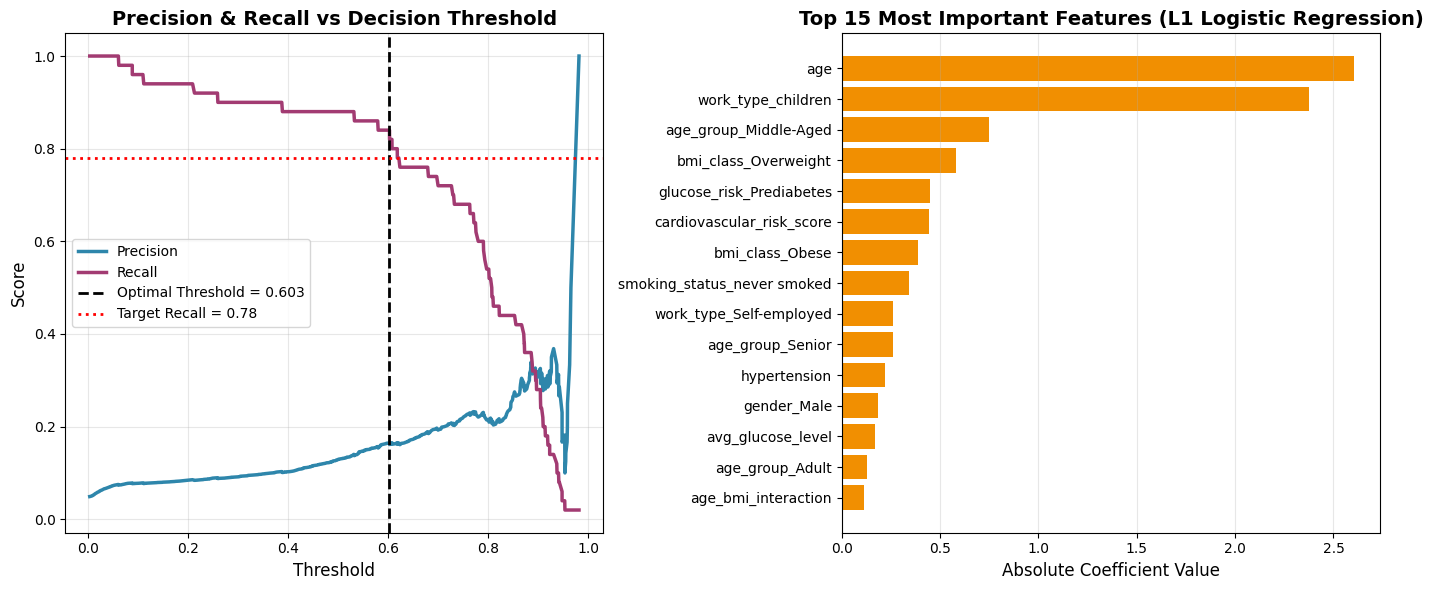

In [11]:
# ------------------------------------------------------------------
plt.figure(figsize=(14, 6))

# Plot 1: Precision & Recall vs Threshold
plt.subplot(1, 2, 1)
plt.plot(thresholds, precisions[:-1], label="Precision", color="#2E86AB", linewidth=2.5)
plt.plot(thresholds, recalls[:-1], label="Recall", color="#A23B72", linewidth=2.5)
plt.axvline(BEST_THRESHOLD, color="black", linestyle="--", linewidth=2,
            label=f"Optimal Threshold = {BEST_THRESHOLD:.3f}")
plt.axhline(target_recall, color="red", linestyle=":", linewidth=2,
            label=f"Target Recall = {target_recall}")

plt.title("Precision & Recall vs Decision Threshold", fontsize=14, fontweight='bold')
plt.xlabel("Threshold", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)


plt.subplot(1, 2, 2)

feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature_{i}" for i in range(X_train.shape[1])]


coef_abs = np.abs(log_reg.coef_[0])
indices = np.argsort(coef_abs)[::-1][:15]

plt.barh(range(15), coef_abs[indices], color="#F18F01")
plt.yticks(range(15), [feature_names[i] for i in indices])
plt.gca().invert_yaxis()
plt.xlabel("Absolute Coefficient Value", fontsize=12)
plt.title("Top 15 Most Important Features (L1 Logistic Regression)", fontsize=14, fontweight='bold')
plt.grid(True, axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# ==================== deployment_model.py ====================
import pickle
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression


def train_and_save_final_model(X, y, model_path="stroke_model_final.pkl"):
    final_model = LogisticRegression(
        penalty='l1',
        C=0.3,
        class_weight='balanced',
        solver='saga',
        max_iter=1000,
        random_state=42,
        n_jobs=-1
    )
    final_model.fit(X, y)
    
    
    with open(model_path, 'wb') as f:
        pickle.dump({
            'model': final_model,
            'threshold': 0.6027  
        }, f)
    
    

def predict_stroke_probability(input_features, model_path="stroke_model_final.pkl"):

    with open(model_path, 'rb') as f:
        saved = pickle.load(f)
    
    model = saved['model']
    THRESHOLD = saved['threshold']   # 0.6027
    
    
    if isinstance(input_features, dict):
        input_df = pd.DataFrame([input_features])
    else:
        input_df = pd.DataFrame(input_features, columns=X.columns)  
    
    proba = model.predict_proba(input_df)[:, 1][0]
    prediction = 1 if proba >= THRESHOLD else 0
    
    return {
        "stroke_probability": round(float(proba), 4),
        "final_prediction": "High Risk - Stroke Likely" if prediction == 1 else "Low Risk - No Stroke",
        "model_decision": "Positive (Stroke)" if prediction == 1 else "Negative (No Stroke)"
    }

